In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from forex_python.converter import CurrencyRates
from datetime import datetime

In [2]:
print("Welcome to the Financial Instrument Visual Evaluator.")
print("You’ll be prompted to enter tickers, instrument types, sectors, and other data.")
print("We'll collect price and fundamental data and generate charts for evaluation.")

Welcome to the Financial Instrument Visual Evaluator.
You’ll be prompted to enter tickers, instrument types, sectors, and other data.
We'll collect price and fundamental data and generate charts for evaluation.


In [3]:
instruments = []

while True:
    ticker = input("Enter ticker symbol (or type 'done' to finish): ").strip()
    if ticker.lower() == 'done':
        break
    instrument_type = input("Instrument Type (Stock, ETF, Bond, etc.): ").strip()
    sector = input("Sector (e.g., Technology, Healthcare): ").strip()
    region = input("Region (US, Europe, Asia-Pacific, etc.): ").strip()
    allocation = float(input("Allocation percentage (0-100): ").strip())
    currency = input("Currency (USD or TWD): ").strip().upper()

    instruments.append({
        "Ticker": ticker,
        "Instrument Type": instrument_type,
        "Sector": sector,
        "Region": region,
        "Allocation (%)": allocation,
        "Currency": currency,
        "Conversion Rate (to TWD)": None
    })

df = pd.DataFrame(instruments)


In [4]:
c = CurrencyRates()
try:
    usd_to_twd = c.get_rate('USD', 'TWD')
    df.loc[df['Currency'] == 'USD', 'Conversion Rate (to TWD)'] = usd_to_twd
    df.loc[df['Currency'] == 'TWD', 'Conversion Rate (to TWD)'] = 1.0
    print(f"USD to TWD rate: {usd_to_twd}")
except Exception as e:
    print(f"Currency conversion failed: {e}")
    df['Conversion Rate (to TWD)'] = 1.0  # fallback


Currency conversion failed: Expecting value: line 1 column 1 (char 0)


In [5]:
price_data = {}
for ticker in df['Ticker']:
    try:
        stock = yf.Ticker(ticker)
        hist_daily = stock.history(period="1y", interval="1d")
        hist_weekly = stock.history(period="5y", interval="1wk")
        price_data[ticker] = {"1y_daily": hist_daily, "5y_weekly": hist_weekly}
        print(f"Downloaded data for {ticker}")
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")


Downloaded data for VTI
Downloaded data for AAPL
Downloaded data for TSLA
Downloaded data for 0050.TW


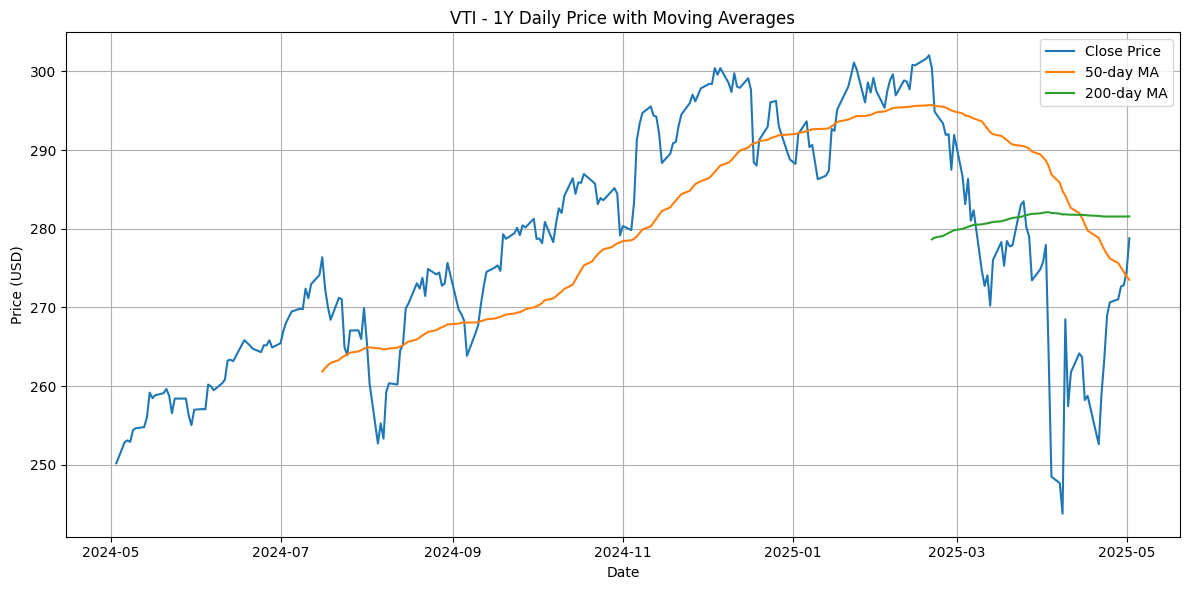

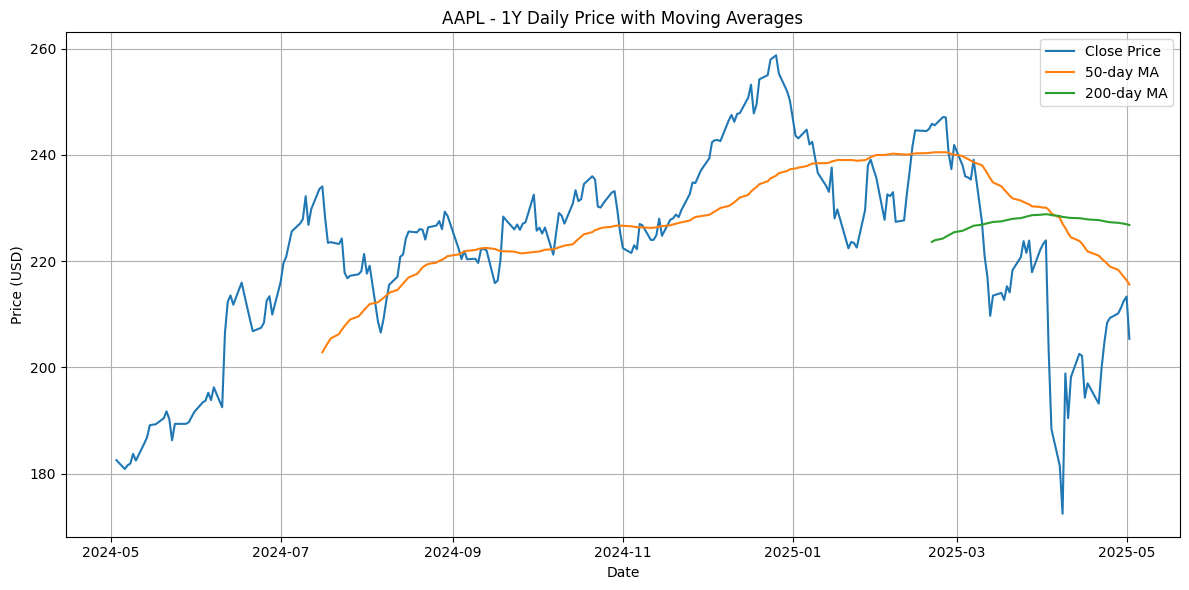

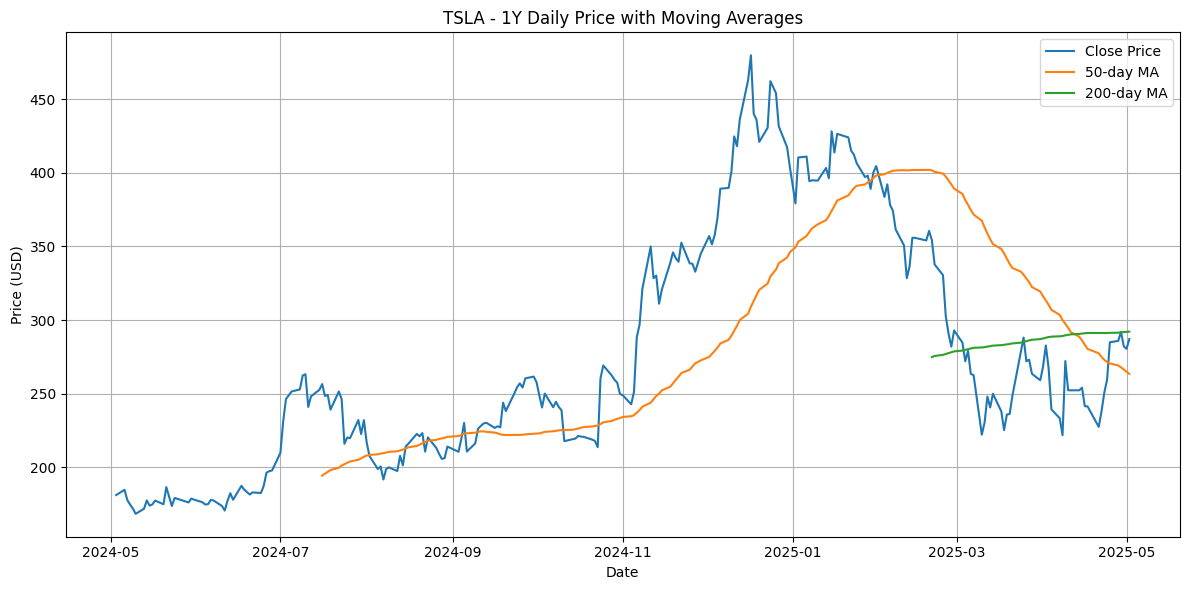

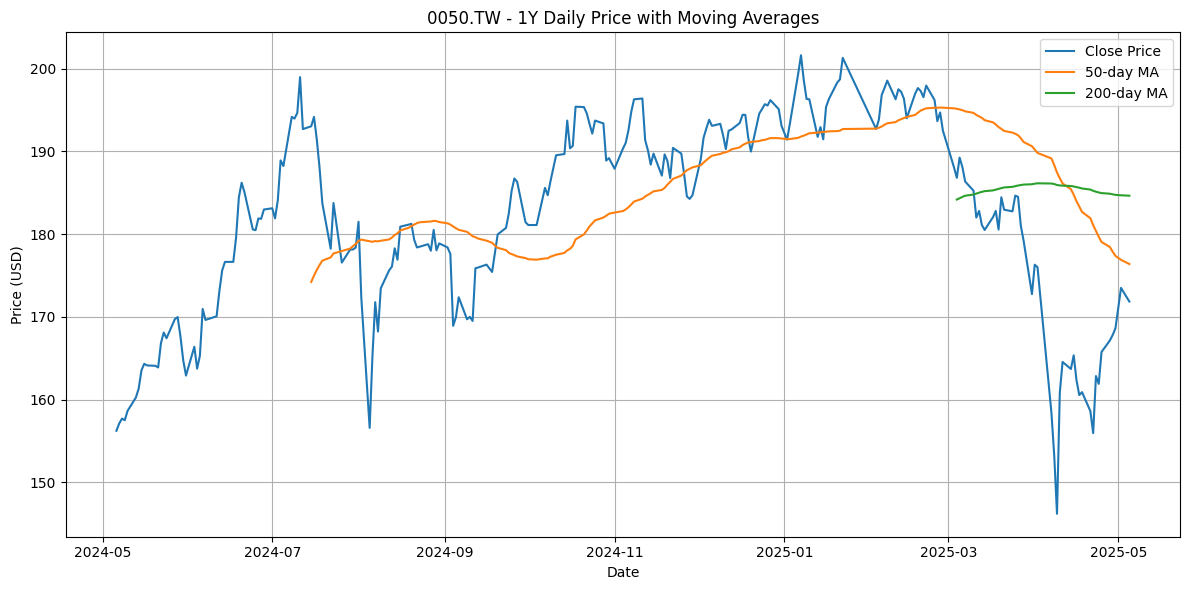

In [7]:
# Plot price + moving averages for all tickers
for ticker in df['Ticker']:
    if ticker not in price_data:
        print(f"Skipping {ticker} due to missing data.")
        continue
    
    data = price_data[ticker]['1y_daily']
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['MA200'] = data['Close'].rolling(window=200).mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['MA50'], label='50-day MA')
    plt.plot(data['MA200'], label='200-day MA')
    plt.title(f"{ticker} - 1Y Daily Price with Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()